<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/%E2%80%9EEnsemble_testing_ipynb%E2%80%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


Load IRIS database and do Decision Tree clasification.

In [2]:
X, y = load_iris(return_X_y=True)


## *Let's do in correct way by spliting data into training, validation and testing sets with stratified spliting*


In [3]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
np.bincount(y_temp)

array([40, 40, 40])

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=10, shuffle=True, stratify=y_temp)
X_train.shape

(96, 4)

Scaling data by normalisation.


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)
X_valid_std=scaler.transform(X_valid)

In [6]:
from sklearn.preprocessing import MinMaxScaler


In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

In [8]:
dtc_1 = RandomForestClassifier(random_state=123)
dtc_1.fit(X_train, y_train)
y_pred = dtc_1.predict(X_test)
scores_dtc_1=metrics.accuracy_score(y_test,y_pred)
print('Acc_RandomForestClassifier = ', scores_dtc_1)



Acc_RandomForestClassifier =  0.9666666666666667


In [19]:
metrics.confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 1,  9,  0],
       [ 0,  1,  9]])

In [28]:
np.column_stack((y_test,y_pred))

array([[2, 2],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [2, 2],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [2, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

Confusion matrix, without normalization
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0.9]]


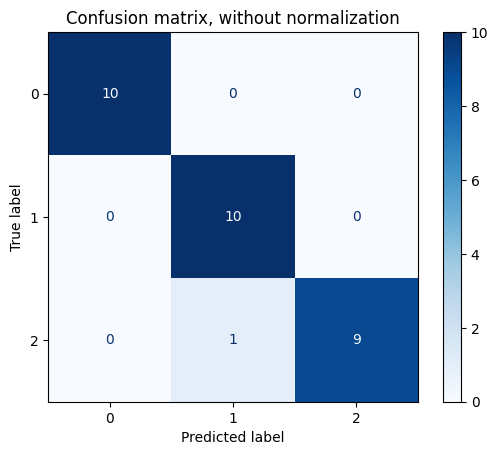

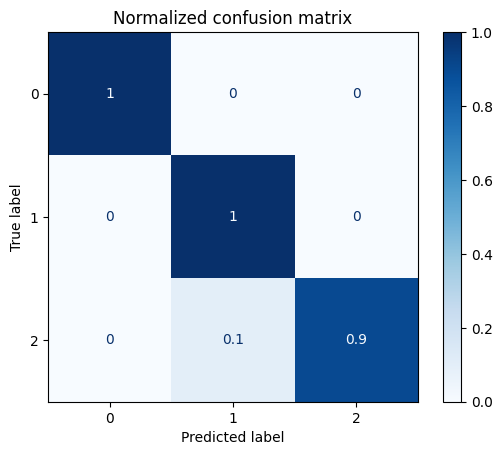

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        dtc_1,
        X_test,
        y_test,
        display_labels=['0','1','2'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Feature: 0, Score: 0.09743
Feature: 1, Score: 0.02969
Feature: 2, Score: 0.42175
Feature: 3, Score: 0.45112


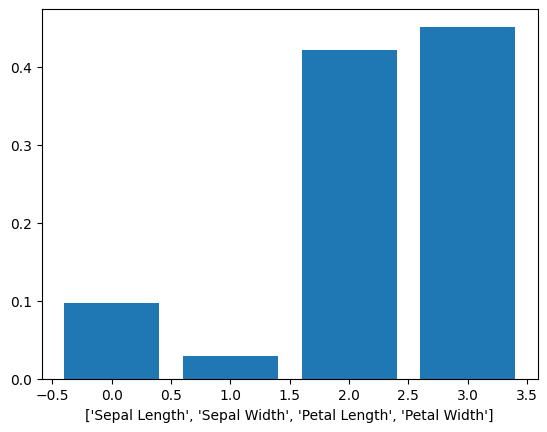

In [10]:
importance = dtc_1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
#create a new random forest classifier
rf = RandomForestClassifier(random_state=42)
#create a dictionary of all values we want to test for n_estimators
params_rf = {"n_estimators": [2, 3, 5, 9,11,15,25,50,100], 'criterion' :['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth' : [2,3,4,5,6] }
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)
#check best n_estimators value
print(rf_gs)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [2, 3, 5, 9, 11, 15, 25, 50, 100]})
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 11}
0.958421052631579


In [31]:
rf = RandomForestClassifier(n_estimators=11, criterion= 'gini', max_features= 'sqrt', max_depth= 5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
scores_rf=metrics.accuracy_score(y_test,y_pred)
scores_rf

0.9666666666666667

Bagging classifier (https://www.geeksforgeeks.org/ml-bagging-classifier/)

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# initialize the base classifier
base_cls = DecisionTreeClassifier(criterion="entropy")

# no. of base classifier
num_trees = 50

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 123)
model_b = model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model_b.predict(X_test)
scores_abc=metrics.accuracy_score(y_test,y_pred)
print('Acc_BaggingClassifier = ', scores_abc)


Acc_BaggingClassifier =  0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier (https://www.datacamp.com/tutorial/adaboost-classifier-python)

In [13]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
scores_abc=metrics.accuracy_score(y_test,y_pred)
print('Acc_AdaBoostClassifier = ', scores_abc)

Acc_AdaBoostClassifier =  0.9666666666666667


In [36]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# **How to Develop XGBoost Model**

In [53]:
from xgboost import XGBClassifier
# fit model no training data
xgbc = XGBClassifier( n_estimators=11, max_depth =5)
xgbc.fit(X_train, y_train)
# make predictions for test data
y_pred = xgbc.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: " ,accuracy)


Accuracy:  0.9333333333333333


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
# - cross validataion
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

Mean cross-validation score: 0.94
K-fold CV average score: 0.93
[[10  0  0]
 [ 1  9  0]
 [ 0  1  9]]


In [55]:
scores

array([0.9 , 0.95, 0.95, 0.95, 0.95])